In [33]:
# Tratamiento de datos
# ===============================================================================
import pandas as pd
import numpy as np
import datetime
import locale
# Set the locale to your country's format
locale.setlocale(locale.LC_ALL, 'es_ES')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Gráficos
# ==============================================================================
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Guardar modelo
# ==============================================================================
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Cargamos el archivo de Weather
# ===============================================================================

df = pd.read_csv("../data/Datosdiarios_1920-2022_combinado.csv",sep=";",dtype={"fecha":str})

In [35]:
# Comprobamos si hay duplicados
# ===============================================================================

df.duplicated().sum()

0

In [36]:
# Eliminamos estaciones con deficiencias y Canarias para no desvirtuar el dato
# ===============================================================================

df = df[df['indicativo'].isin(['0016A', '0076', '0200E', '0324A', '0367', '1014A', '1024E', '1082', '1109', '1208H', '1212E', '1249X', '1351', '1387', '1393', '1400', '1428', '1473A', '1475X', '1484C', '1495', '1505', '1549', '1631E',
'1700X', '2030', '2150H', '2235U', '2331', '2374X', '2400E', '2422', '2444', '2462', '2465', '2539', '2614', '2661', '2755X', '2775X', '2867', '2870', '2916A', '2946X', '3013', '3129', '3130C', '3175', '3191E', '3195',
'3200', '3260B', '3365A', '3469A', '3526X', '4067', '4121', '4358X', '4410X', '4452', '4642E', '5270B', '5402', '5514', '5530E', '5783', '5796', '5910', '5960', '5973', '6000A', '6001', '6155A', '6325O', '6367B', '7012C', '7031X',
'7178I', '7209', '7228', '8019', '8025', '8096', '8175', '8178D', '8293X', '8309X', '8325X', '8368U', '8414A', '8416Y', '8500A', '9019B', '9091R', '9111', '9170', '9201K', '9244X', '9263D', '9294E', '9381I', '9390', '9394X',
'9434', '9563X', '9569A', '9573X', '9585', '9619', '9771C', '9898', '9981A', 'B013X', 'B228', 'B248', 'B278', 'B434X', 'B569X', 'B893', 'B954'])]

In [37]:
# Filtramos por el año 2022
# ===============================================================================

df = df[df['year'].isin([2022])]

In [38]:
# Comprobamos si hay nulos
# ===============================================================================

(df.isnull().sum() / len(df) * 100).round(2)

indicativo      0.00
nombre          0.00
provincia       0.00
altitud         0.00
fecha           0.00
year            0.00
month           0.00
day             0.00
diames          0.00
tmed            0.50
tmax            0.46
tmin            0.49
horatmax        1.46
horatmin        1.54
prec            1.25
velmedia        5.73
dir             5.54
racha           5.54
horaracha       5.55
sol            25.55
presMax        20.34
horaPresMax    20.34
presMin        20.34
horaPresMin    20.36
dtype: float64

In [39]:
# Cargamos las columnas
# ===============================================================================


df.columns.unique()

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'fecha', 'year',
       'month', 'day', 'diames', 'tmed', 'tmax', 'tmin', 'horatmax',
       'horatmin', 'prec', 'velmedia', 'dir', 'racha', 'horaracha', 'sol',
       'presMax', 'horaPresMax', 'presMin', 'horaPresMin'],
      dtype='object')

In [40]:
# Vemos las variables numéricas
# ===============================================================================

df.describe().T

,count,mean,std,min,25%,50%,75%,max
altitud,38524.0,424.591190,370.692113,2.0,61.0,353.0,690.0,1798.0
year,38524.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
month,38524.0,6.522687,3.443972,1.0,4.0,7.0,10.0,12.0
day,38524.0,15.723860,8.796934,1.0,8.0,16.0,23.0,31.0
tmed,38333.0,16.590199,7.306435,-6.0,10.9,16.2,22.4,35.7
tmax,38348.0,22.389650,8.362632,-3.6,15.8,21.6,28.9,45.2
tmin,38334.0,10.791245,7.040207,-11.5,5.8,10.9,16.1,29.0
prec,38041.0,1.499740,5.577741,0.0,0.0,0.0,0.1,172.4
velmedia,36316.0,2.868168,1.737007,0.0,1.7,2.5,3.6,16.7
dir,36389.0,27.610322,26.434303,0.0,11.0,22.0,30.0,99.0


In [41]:
# Generamos un df con las prec por mes nacional, con la media de cada una de las estaciones
# ===============================================================================

df_prec_mes = pd.DataFrame()
k = 0
for mes in range(1,13,1):
    df_mes = df[df["month"]== mes]
    lista_estaciones_mes= df_mes["indicativo"].drop_duplicates().to_list()
    valores_mes = []
    for est in lista_estaciones_mes:
        df_mes_est = df_mes[df_mes["indicativo"]== est]
        preci = df_mes_est["prec"].sum()
        valores_mes.append(preci)
    df_prec_mes.at[k,"mes"]= mes
    df_prec_mes.at[k,"media"]=np.mean(valores_mes)
    k+=1

In [42]:
# Generamos un df con las prec diaria, con la media de cada una de las estaciones
# ===============================================================================

listafechas = df['fecha'].drop_duplicates().tolist()

df_diario = pd.DataFrame()
i = 0
for fecha in listafechas:
    df_fecha = df[df['fecha'] == fecha]

    df_diario.at[i, 'fecha'] = fecha
    df_diario.at[i, 'media'] = df_fecha['prec'].mean()
    i += 1

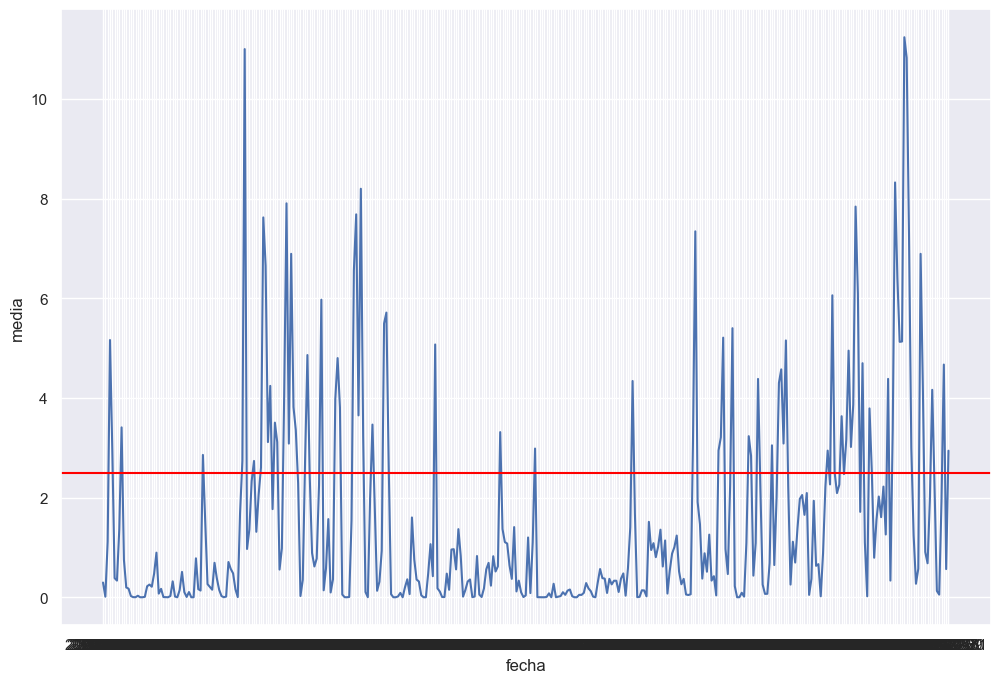

In [43]:
# Visualizamos las prec diarias en el periodo de 2022
# ===============================================================================

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(data=df_diario, y="media", x="fecha")

x_min, x_max = ax.get_xlim()

# Añade una línea vertical desde 2,5, que es lo que hemso detrminado como lluvia
ax.axhline(y=2.5, xmin=0, xmax=1, color='red');

In [44]:
# Generamos un df con las prec mensuales, con la media de cada una de las estaciones
# ===============================================================================

df_prec_mes = pd.DataFrame()
z = 0
for mes in range(1, 13):
    df_mes = df[df["month"] == mes]
    lista_estaciones_mes = df_mes["indicativo"].drop_duplicates().to_list()
    valores_mes = []
    for est in lista_estaciones_mes:
        df_mes_est = df_mes[df_mes["indicativo"] == est]
        preci = df_mes_est["prec"].sum()
        valores_mes.append(preci)
    df_prec_mes.at[z, "mes"] = mes
    df_prec_mes.at[z, "media"] = np.mean(valores_mes)
    z+= 1
    
# Guardamos el resultado en un csv para unirlo a nuestro df original
df_prec_mes.to_csv('../data/Weather_prec_2022.csv')

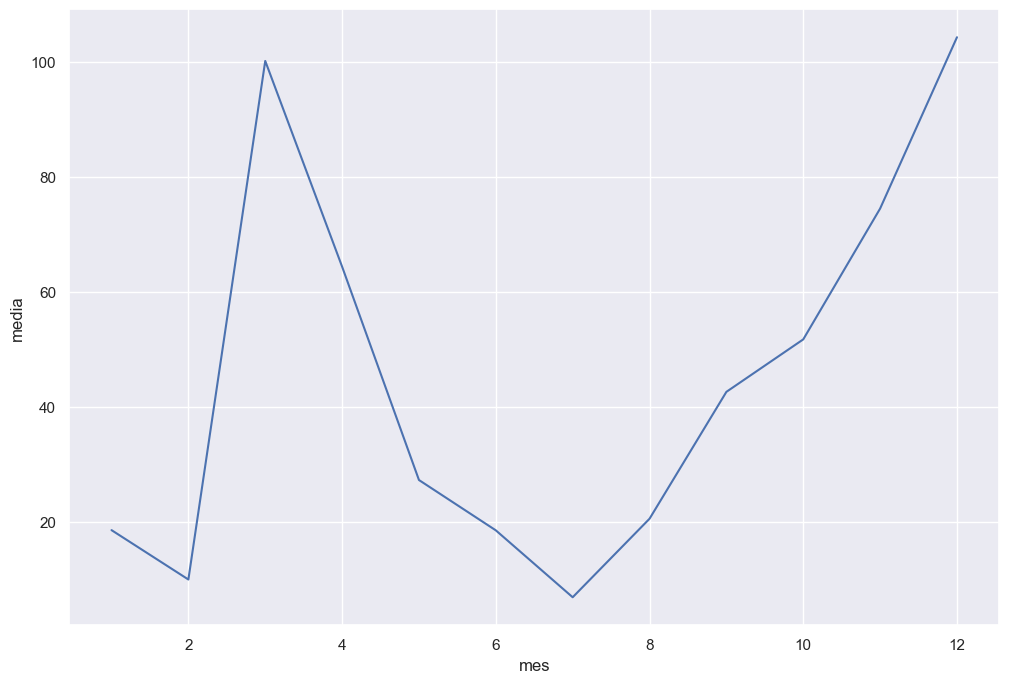

In [45]:
# Visualizamos las prec mensuales en el periodo de 2022
# ===============================================================================

ax = sns.lineplot(data=df_prec_mes, y="media", x="mes");

In [46]:
# Guardamos el resultado de nuestro reporte mensual de prec
# ===============================================================================

with open('../data/weahter_day_plot.pkl', 'rb') as adata:
       report_day = pickle.load(adata)

In [47]:
# Renombramos las columnas para poder mergerlas más adelante
# ===============================================================================

report_day = report_day.rename(columns={'ga:date': 'date'})
df_diario = df_diario.rename(columns={'fecha': 'date'})

# formateamos de str a datetime 
report_day['date'] = pd.to_datetime(report_day['date'], format='%Y%m%d')
# convertimos el el datetime otra vez a string con el formato deseado
report_day['date'] = report_day['date'].dt.strftime('%Y-%m-%d')

In [48]:
# Mergeamos los dataframes
# ===============================================================================

df_merged = pd.merge(report_day, df_diario, on='date', how='inner')
df_merged = df_merged[df_merged['ga:channelGrouping'].isin(['Organic Search'])]

In [68]:
# Guardamos el df en un csv
# ===============================================================================

df_merged.to_csv('../data/df_scaled.csv')

In [67]:
# Visualizamos las prec diarias junto con la audiencia diaria en el periodo de 2022
# ===============================================================================

df = px.data.stocks()
fig = px.line(df_merged, x='date', y=['Precipitaciones Medias Diarias','Audiencia Diaria'])
fig.update_yaxes(title_text=None)
fig.update_layout(yaxis=dict(tickfont=dict(color='rgba(0,0,0,0)')))
fig.show()

In [52]:
# juntamos las variables de nuestra hipótesis para ver si existe correlación entre ellas
# ===============================================================================

df2 = df_merged[['ga:sessions','media']]

df2.corr()

,ga:sessions,media
ga:sessions,1.000000,0.639519
media,0.639519,1.000000
